In [ ]:
# Import required libraries
import pandas as pd

# Read the CSV files
hate_speech_fil_train_df = pd.read_csv('hate_speech_filipino_train.csv')
hate_speech_fil_test_df = pd.read_csv('hate_speech_filipino_test.csv')
hate_speech_fil_validate_df = pd.read_csv('hate_speech_filipino_validate.csv')

# Combine all the datasets into a single DataFrame
hate_speech_fil_df = pd.concat([hate_speech_fil_train_df, hate_speech_fil_test_df, hate_speech_fil_validate_df])

# Reset the index of hate_speech_fil_df
hate_speech_fil_df.reset_index(drop=True, inplace=True)

In [ ]:
hate_speech_fil_train_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [ ]:
hate_speech_fil_test_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [ ]:
hate_speech_fil_validate_df

,text,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,@ImYourBaeMax perfect! Para makaharap ni Duter...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [ ]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
24227,Walang katumbas na halaga ng pera ang BOTO at ...,0
24228,Mar Roxas says presidential race is now only b...,0
24229,Ms Miriam to withdraw presidency to give away ...,0
24230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [ ]:
hate_speech_fil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24232 entries, 0 to 24231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24232 non-null  object
 1   label   24232 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 378.8+ KB


###Cleaning Datasets

In [ ]:
# Check for null values.
hate_speech_fil_df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
# Check for duplicates.
hate_speech_fil_df.duplicated().sum()

10356

In [ ]:
# Show the duplicates.
hate_speech_fil_df[hate_speech_fil_df.duplicated()]

,text,label
452,#NogNogHambog,1
481,#OnlyBinayInMakatiSanKaPa,0
543,#OnlyBinayInMakatiSanKaPa,0
576,#OnlyBinayInMakatiSanKaPa,0
598,#OnlyBinayUNAsaIlocos,0
...,...,...
24013,#OnlyBinayUNAsaIlocos,0
24029,#onlybinay,0
24042,#PHvote,0
24158,#PiliPinasDebates2016,1


In [ ]:
# Drop the duplicates.
hate_speech_fil_df.drop_duplicates(inplace=True)

# Reset the index.
hate_speech_fil_df.reset_index(drop=True, inplace=True)
hate_speech_fil_df.duplicated().sum()

0

In [ ]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
13871,Walang katumbas na halaga ng pera ang BOTO at ...,0
13872,Mar Roxas says presidential race is now only b...,0
13873,Ms Miriam to withdraw presidency to give away ...,0
13874,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


###Dataset 2

In [ ]:
raw_toxic_tweets_df = pd.read_csv('FinalBalancedDataset.csv')
raw_toxic_tweets_df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [ ]:
raw_toxic_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
raw_toxic_tweets_df.isnull().sum()
raw_toxic_tweets_df.duplicated().sum()

0

###Restructuring the data frame

In [ ]:
toxic_tweets_df = raw_toxic_tweets_df.copy()
toxic_tweets_df.rename(columns={'tweet': 'text', 'Toxicity': 'label'}, inplace=True)
toxic_tweets_df = toxic_tweets_df[['text', 'label']]

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
56741,"you've gone and broke the wrong heart baby, an...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,1


###Cleaning the Datasets after restructuring the data frame

In [ ]:
# Check for duplicates.
toxic_tweets_df.duplicated().sum()

2432

In [ ]:
# Show the duplicates.
toxic_tweets_df[toxic_tweets_df.duplicated()]

,text,label
46,#model i love u take with u all the time in ...,0
96,#model i love u take with u all the time in ...,0
117,#model i love u take with u all the time in ...,0
162,#model i love u take with u all the time in ...,0
218,#model i love u take with u all the time in ...,0
...,...,...
31886,100 amazing health benefits of cucumbers! #...,0
31904,#model i love u take with u all the time in ...,0
31930,@user #feminismiscancer #feminismisterrorism #...,1
31951,i've just posted a new blog: #secondlife #lone...,0


In [ ]:
toxic_tweets_df.drop_duplicates(inplace=True)

# Reset the index.
toxic_tweets_df.reset_index(drop=True, inplace=True)

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
54308,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
54309,"you've gone and broke the wrong heart baby, an...",1
54310,young buck wanna eat!!.. dat nigguh like I ain...,1
54311,youu got wild bitches tellin you lies,1


In [ ]:
# Verify that there are no duplicates.
toxic_tweets_df.duplicated().sum()

0

###Dataset 3


In [ ]:
raw_hs_and_offensive_lang_df = pd.read_csv('labeled_data.csv')
raw_hs_and_offensive_lang_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
raw_hs_and_offensive_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
raw_hs_and_offensive_lang_df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
raw_hs_and_offensive_lang_df.duplicated().sum()

0

In [ ]:
hs_and_offensive_lang_df = raw_hs_and_offensive_lang_df.copy()
hs_and_offensive_lang_df = hs_and_offensive_lang_df[['tweet', 'class']]
hs_and_offensive_lang_df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)

# The original labels are 0, 1, and 2. They each means 'hate speech', 'offensive language', and 'neither' respectively.
# The original labels 0 and 1 will be mapped to 1 (means toxic) and 2 will be mapped to 0 (means non-toxic)
mapping = {0: 1, 1: 1, 2: 0}
hs_and_offensive_lang_df['label'] = hs_and_offensive_lang_df['label'].map(mapping)

hs_and_offensive_lang_df

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [ ]:
hs_and_offensive_lang_df.duplicated().sum()

0

###Combine Dataframes

In [ ]:
# Make a single data frame for all the datasets.
df = pd.concat([hate_speech_fil_df, toxic_tweets_df, hs_and_offensive_lang_df], ignore_index=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
92967,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
92968,"you've gone and broke the wrong heart baby, an...",0
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


###Cleaning the final dataframe

In [ ]:
df.duplicated().sum()

23492

In [ ]:
df[df.duplicated()]

In [ ]:
df.drop_duplicates(inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df['text'].str.isnumeric()]

,text,label


In [ ]:
df[df['text'] == '']

,text,label


In [ ]:
df.drop(df[df['text'] == ''].index, inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)
df

In [ ]:
# Verify that there are no empty strings.
df[df['text'] == '']

,text,label


In [ ]:
X = df['text']
y = df['label']

print(X.shape)
print(y.shape)

(69480,)
(69480,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52110,)
(17370,)
(52110,)
(17370,)


###Using Countervectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
cvect.fit(X_train)

CountVectorizer()

In [ ]:
# Examine the fitted vocabulary.
feature_names = cvect.get_feature_names_out()
print(feature_names)
print('len:', len(feature_names))
pd.DataFrame(feature_names)

['00' '000' '0000000000000' ... 'ð¾ñ' 'ó¾' 'ø¹ù']
len: 69692


,0
0,00
1,000
2,0000000000000
3,000001
4,002
...,...
69687,ð¾ð½ð
69688,ð¾ð½ðµð
69689,ð¾ñ
69690,ó¾


In [ ]:
# Transform the training data into a document-term matrix.
# X_train_dtm = vect.transform(X_train)
X_train_dtm = cvect.fit_transform(X_train)
# Examine the document-term matrix.

X_train_dtm

<52110x69692 sparse matrix of type '<class 'numpy.int64'>'
	with 653595 stored elements in Compressed Sparse Row format>

In [ ]:
# Transform the testing data (using fitted vocabulary) into a document-term matrix.
X_test_dtm = cvect.transform(X_test)
X_test_dtm

<17370x69692 sparse matrix of type '<class 'numpy.int64'>'
	with 202486 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model using X_train and the fit() method
dt_clf.fit(X_train_dtm, y_train)

# Prediction
y_pred = dt_clf.predict(X_test_dtm)

# Compute accuracy score for Decision Tree model
acc = accuracy_score(y_test, y_pred)
print("Decision Tree model accuracy (in %):", acc * 100)

Decision Tree model accuracy (in %): 85.76856649395509


We chose Monomial Naive Bayes classifier because it can be effective in classifying toxic speeches for several reasons:

Simplicity and efficiency: Monomial Naive Bayes classifiers are relatively simple and computationally efficient. They are based on the assumption of feature independence, which means they treat each feature (word) in isolation, disregarding any relationships or dependencies between them. This assumption allows for faster training and classification compared to more complex models.

Bag-of-words representation: Monomial Naive Bayes classifiers commonly use a bag-of-words representation, where the order of words is disregarded and only the occurrence or frequency of each word is considered. This approach is suitable for toxic speech classification because toxic speeches often contain specific keywords or phrases that can be indicative of their toxicity. By focusing on individual words, the classifier can capture these patterns effectively.

Text categorization: Naive Bayes classifiers are particularly well-suited for text categorization tasks like toxic speech classification. They calculate the probability of a given speech belonging to a particular class (e.g., toxic or non-toxic) based on the occurrence of words in the speech. This makes them effective in identifying toxic patterns by analyzing the presence or absence of specific words associated with toxic speech.

Reasonable performance: Despite their simplicity, Naive Bayes classifiers have shown good performance in various text classification tasks, including toxic speech detection. They can achieve reasonably high accuracy when trained on appropriately labeled data. Moreover, they can handle large feature spaces (vocabulary size) efficiently, making them suitable for tasks involving a wide range of words.

It's worth noting that while Monomial Naive Bayes classifiers can be effective in toxic speech classification, they have limitations. For example, they assume independence between features, which may not always hold in the context of language. Although, we can use a trick to let this model 'understand' the context of specific substrings by increasing the n-gram param value. Additionally, they may struggle with capturing more complex linguistic structures or context beyond individual words. Nonetheless, with proper feature engineering and training data, they can be a valuable tool in identifying toxic speeches.

For testing the model, we use 20% of the original dataset while 80% was used to train the model.

###Building the MNB model (w/o optimized params).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [ ]:
# Train the model using X_train_dtm and the fit() method.
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

###Evaluating the MNB model (baseline performance).

In [ ]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.
y_pred_class = mnb.predict(X_test_dtm)

In [ ]:
# Calculate the accuracy of the predictions.
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.8637881404720783

array([[8391, 1409],
       [ 957, 6613]])

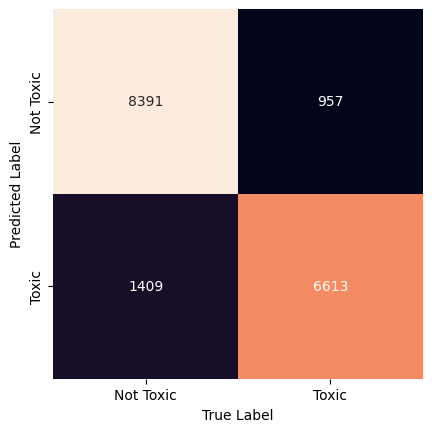

In [ ]:
# Print the confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
# Print the classification report.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9800
           1       0.82      0.87      0.85      7570

    accuracy                           0.86     17370
   macro avg       0.86      0.86      0.86     17370
weighted avg       0.87      0.86      0.86     17370



In [ ]:
# Show the predicted probabilities for the X_test_dtm (non-toxic class).
y_pred_prob_non_toxic_class = mnb.predict_proba(X_test_dtm)[:, 0]
y_pred_prob_non_toxic_class

array([3.04449604e-05, 2.17034247e-07, 9.80302846e-09, ...,
       1.69247459e-01, 9.99999602e-01, 9.99548799e-01])

In [ ]:
# Show the predicted probabilities for the X_test_dtm (toxic class).
y_pred_prob_toxic_class = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob_toxic_class

array([9.99969555e-01, 9.99999783e-01, 9.99999990e-01, ...,
       8.30752541e-01, 3.98301173e-07, 4.51200757e-04])

In [ ]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.
test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob_non_toxic': y_pred_prob_non_toxic_class, 'prob_toxic': y_pred_prob_toxic_class})

# Reset the index.
test_results_df.reset_index(drop=True, inplace=True)

test_results_df

,text,actual,predicted,prob_non_toxic,prob_toxic
0,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,3.044496e-05,9.999696e-01
1,A lot of you niggas turned these bitches into ...,1,1,2.170342e-07,9.999998e-01
2,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,9.803028e-09,1.000000e+00
3,our playground for the morning. big bear tri ...,0,0,9.955114e-01,4.488642e-03
4,"""@ellisluciano: Binay as President #ShortHorro...",1,1,4.126098e-01,5.873902e-01
...,...,...,...,...,...
17365,Mad respect to Affleck for refusing to wear a ...,0,0,9.687911e-01,3.120894e-02
17366,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,1.133198e-14,1.000000e+00
17367,@imcessfederico trillion yan ! Wala eh... Only...,0,1,1.692475e-01,8.307525e-01
17368,fathersdaymessage #fathers #day #message buy...,0,0,9.999996e-01,3.983012e-07


### 3 | Hypertuning the parameters.
Since our dataset also contains Filipino and TagLish entries, we decided to make a custom stopwords list that include these languages.

###Making a custom stop words.

In [ ]:
# Making a custom stop words list that includes the Filipino language.

# Built-in English stop words.
english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

# Generated by ChatGPT.
filipino_stop_words1 = [
    "ako", "akin", "ako'y", "amin", "aming", "ang", "ano", "anuman", "apat", "at", "atin", "ating",
    "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din", "dito", "doon",
    "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto", "habang", "hanggang", "hindi", "huwag", "iba",
    "ibaba", "ibabaw", "ibig", "ikaw", "ilagay", "ilalim", "ilan", "inyong", "isa", "isang", "ito", "iyo",
    "iyon", "iyong", "ka", "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya", "kanyang",
    "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kay", "kaya", "kaysa", "ko", "kung", "laban",
    "lahat", "lamang", "likod", "lima", "maaari", "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "mga",
    "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging", "nagkaroon", "nais", "nakita", "namin", "napaka",
    "narito", "nasaan", "ng", "nga", "ngayon", "ni", "nila", "nilang", "nito", "niya", "niyang", "noon",
    "o", "pag", "pala", "para", "pati", "pero", "pumunta", "pumupunta", "sa", "saan", "sabi", "sabihin",
    "sarili", "si", "sila", "sino", "siya", "tatlo", "tayo", "tulad", "tungkol", "una", "walang"
]

# From an open-source GitHub repo (ref: https://github.com/stopwords-iso/stopwords-tl).
filipino_stop_words2 = [
    'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating',
    'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila',
    'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay',
    'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa',
    'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais',
    'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni',
    'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil',
    'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago',
    'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa',
    'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan', 'karamihan', 'iba', 'tulad',
    'lamang', 'pareho', 'kaya', 'kaysa', 'masyado', 'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon',
    'kailanman', 'sabi', 'nabanggit', 'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita',
    'katulad', 'mahusay', 'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
    'una', 'pangalawa'
]

# Get the union of the two filipino stop words lists.
filipino_stop_words = list(set(filipino_stop_words1).union(set(filipino_stop_words2)))

# Get the union of the english and filipino stop words lists.
custom_stop_words = list(english_stop_words.union(filipino_stop_words))

###Search for the optimal parameters.

In [ ]:
# Hyperparameter tuning using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with CountVectorizer and MultinomialNB.
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

# Create a dictionary of parameters to search.
params = {
    'cvec__stop_words': [custom_stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [0.01, 0.1, 0.2, 0.3],
    'mnb__alpha': [0.01, 0.1, 1.0, 10.0],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', refit=True)

# Fit GridSearch to training data.
gs.fit(X_train, y_train)
gs.best_params_

4 | Using the new parameters.
Building the model.

In [ ]:
# Build a new model using the best parameters.
cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 2), max_df=0.2, min_df=2, lowercase=False, binary=True)
mnb = MultinomialNB(alpha=1.0)

# Vectorize the data.
X_train_dtm = cvect.fit_transform(X_train)
X_test_dtm = cvect.transform(X_test)

# Fit the data to the model.
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

###Evaluating Model

In [ ]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.
y_pred_class = mnb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

0.8709268854346575

array([[8495, 1305],
       [ 937, 6633]])

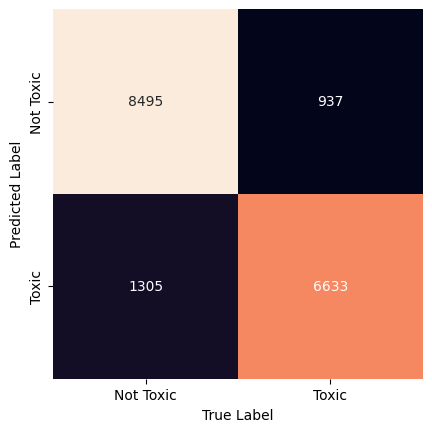

In [ ]:
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      9800
           1       0.84      0.88      0.86      7570

    accuracy                           0.87     17370
   macro avg       0.87      0.87      0.87     17370
weighted avg       0.87      0.87      0.87     17370



In [ ]:
raw = mnb.predict_proba(X_test_dtm)
raw

array([[7.55255859e-03, 9.92447441e-01],
       [1.15466699e-06, 9.99998845e-01],
       [4.16633513e-10, 1.00000000e+00],
       ...,
       [8.71676839e-02, 9.12832316e-01],
       [1.00000000e+00, 2.77420961e-11],
       [9.93314764e-01, 6.68523605e-03]])

In [ ]:
# Show the predicted probabilities for the X_test_dtm (non-toxic class).
y_pred_prob_non_toxic_class = mnb.predict_proba(X_test_dtm)[:, 0]
y_pred_prob_non_toxic_class

array([7.55255859e-03, 1.15466699e-06, 4.16633513e-10, ...,
       8.71676839e-02, 1.00000000e+00, 9.93314764e-01])

In [ ]:
# Show the predicted probabilities for the X_test_dtm (toxic class).\
y_pred_prob_toxic_class = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob_toxic_class

array([9.92447441e-01, 9.99998845e-01, 1.00000000e+00, ...,
       9.12832316e-01, 2.77420961e-11, 6.68523605e-03])

In [ ]:
#Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.
test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob_non_toxic': y_pred_prob_non_toxic_class, 'prob_toxic': y_pred_prob_toxic_class})

# Reset the index.
test_results_df.reset_index(drop=True, inplace=True)

test_results_df

,text,actual,predicted,prob_non_toxic,prob_toxic
0,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,7.552559e-03,9.924474e-01
1,A lot of you niggas turned these bitches into ...,1,1,1.154667e-06,9.999988e-01
2,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,4.166335e-10,1.000000e+00
3,our playground for the morning. big bear tri ...,0,0,9.396200e-01,6.038000e-02
4,"""@ellisluciano: Binay as President #ShortHorro...",1,0,7.096837e-01,2.903163e-01
...,...,...,...,...,...
17365,Mad respect to Affleck for refusing to wear a ...,0,0,9.530769e-01,4.692311e-02
17366,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,5.077755e-13,1.000000e+00
17367,@imcessfederico trillion yan ! Wala eh... Only...,0,1,8.716768e-02,9.128323e-01
17368,fathersdaymessage #fathers #day #message buy...,0,0,1.000000e+00,2.774210e-11


### 5 | Using Other AI Model (for comparison)

In [ ]:
df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


5.1 | K-Means using 2 clusters.
The K-means models will use the X_train_dtm as its training set. The K-means algorithm aims to label unlabeled data, which in this case, the labeled training set will be considered unlabeled data. This data will then be compared to the actual labeled values in the y_train set, hence the increase in the number of test values when compared to the test values of the MNB models.

Increasing the unlabeled data to contain the entire dataset results to a negligible difference in accuracy rate but a significant increase in runtime, hence only the test dataset, which contains 80% of the dataset, is used.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_train_dtm)
kmeans.cluster_centers_.shape

(2, 68698)

In [ ]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask], keepdims=True)[0]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, labels)

0.6751871042026483

Text(113.9222222222222, 0.5, 'Predicted label')

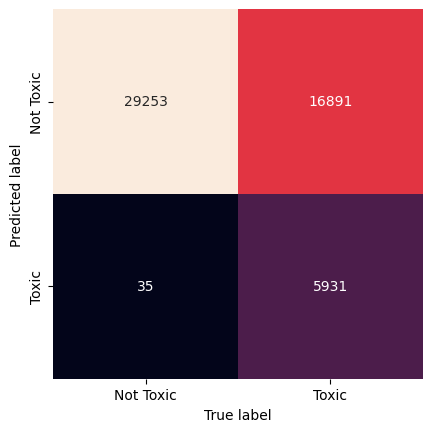

In [ ]:
mat = confusion_matrix(y_train, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

5.2 | K-Means using 2 clusters with t-SNE.

In [ ]:
from sklearn.manifold import TSNE

# Using t-SNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=69)
projection = tsne.fit_transform(X_train_dtm)

# Compute the clusters
kmeans = KMeans(n_clusters=2, n_init=10, random_state=69)
clusters = kmeans.fit_predict(projection)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask], keepdims=True)[0]

In [ ]:
accuracy_score(y_train, labels)

In [ ]:
mat = confusion_matrix(y_train, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

6 | Results and Discussions
6.1 | Existing Solutions for the 'Toxic Speech Classifier' problem.

In [ ]:
# Show the correctly classified text.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & ((test_results_df['prob_toxic'] > 0.5) | (test_results_df['prob_non_toxic'] > 0.5))]

In [ ]:
# Show the misclassified text.

test_results_df[(test_results_df['actual'] != test_results_df['predicted'])]

In [ ]:
# Show some toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['predicted'] == 1) &(test_results_df['prob_toxic'] > 0.95)].sort_values(by='prob_toxic').head(20)

In [ ]:
#  Show some non-toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['predicted'] == 0) &(test_results_df['prob_non_toxic'] > 0.95)].sort_values(by='prob_non_toxic').head(20)

In [ ]:
#  Show some non-toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['predicted'] == 0) &(test_results_df['prob_non_toxic'] > 0.95)].sort_values(by='prob_non_toxic').head(20)